In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
moons = make_moons(n_samples=200,noise=0.2,random_state=0)
x = moons[0] # data
y = moons[1] # target (正解ラベル)


In [3]:
x

array([[ 0.74346118,  0.46465633],
       [ 1.65755662, -0.63203157],
       [-0.15878875,  0.25584465],
       [-1.088752  , -0.39694315],
       [ 1.768052  , -0.25443213],
       [ 1.95416454, -0.12850579],
       [ 0.93694537,  0.36597075],
       [ 0.88446589, -0.47595401],
       [ 0.80950246,  0.3505231 ],
       [ 1.2278091 , -0.64785108],
       [-0.38454276,  0.50916381],
       [ 0.09252135, -0.31618454],
       [ 1.79531658, -0.32235591],
       [ 1.43861749, -0.15796611],
       [-0.82364866,  0.86822754],
       [ 0.99633397,  0.1731019 ],
       [ 0.66388701,  0.94659669],
       [ 0.13229471, -0.26032619],
       [ 0.2482245 ,  0.7860477 ],
       [-1.00392102,  1.15207238],
       [ 2.08208438,  0.00715606],
       [ 0.87081342, -0.4366643 ],
       [ 0.37268327,  1.01743002],
       [ 1.26735927, -0.11813675],
       [-0.13270154,  1.26653562],
       [ 0.20331   ,  0.19519454],
       [ 1.98373996, -0.11222315],
       [ 1.82749513, -0.03085446],
       [-0.03857867,

In [4]:
from matplotlib.colors import ListedColormap

# 境界をプロットする関数
def plot_decision_boundary(model,x,y,margin=0.3):
    _x1 = np.linspace(x[:,0].min()-margin,x[:,0].max()+margin,100)
    _x2 = np.linspace(x[:,1].min()-margin,x[:,1].max()+margin,100)
    x1,x2 = np.meshgrid(_x1,_x2)
    x_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = model.predict(x_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['mediumblue','orangered'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)

# 散布図をプロットする関数
def plot_dataset(x,y):
    plt.plot(x[:,0][y==0],x[:,1][y==0],'bo',ms=15)
    plt.plot(x[:,0][y==1],x[:,1][y==1],'r^',ms=15)
    plt.xlabel("$x_0$",fontsize=30)
    plt.ylabel("$x_1$",fontsize=30,rotation=0)

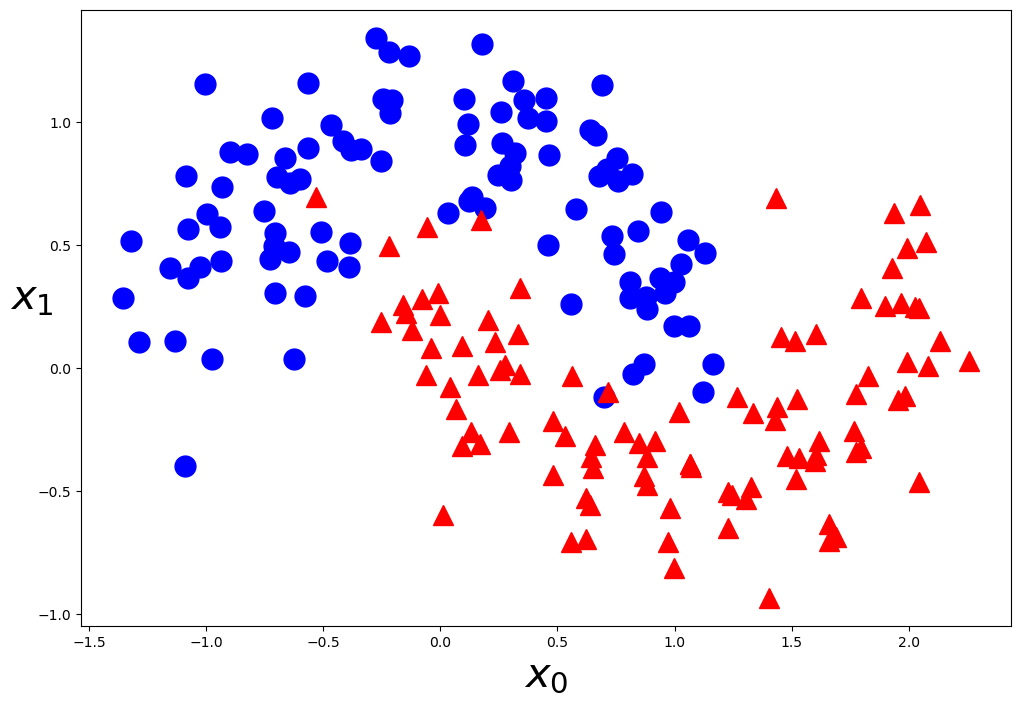

In [5]:
plt.figure(figsize=(12,8))
plot_dataset(x,y)
plt.show()

In [6]:
# 分類を実行
# 決定木の場合
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

tree_clf = DecisionTreeClassifier().fit(x_train,y_train)

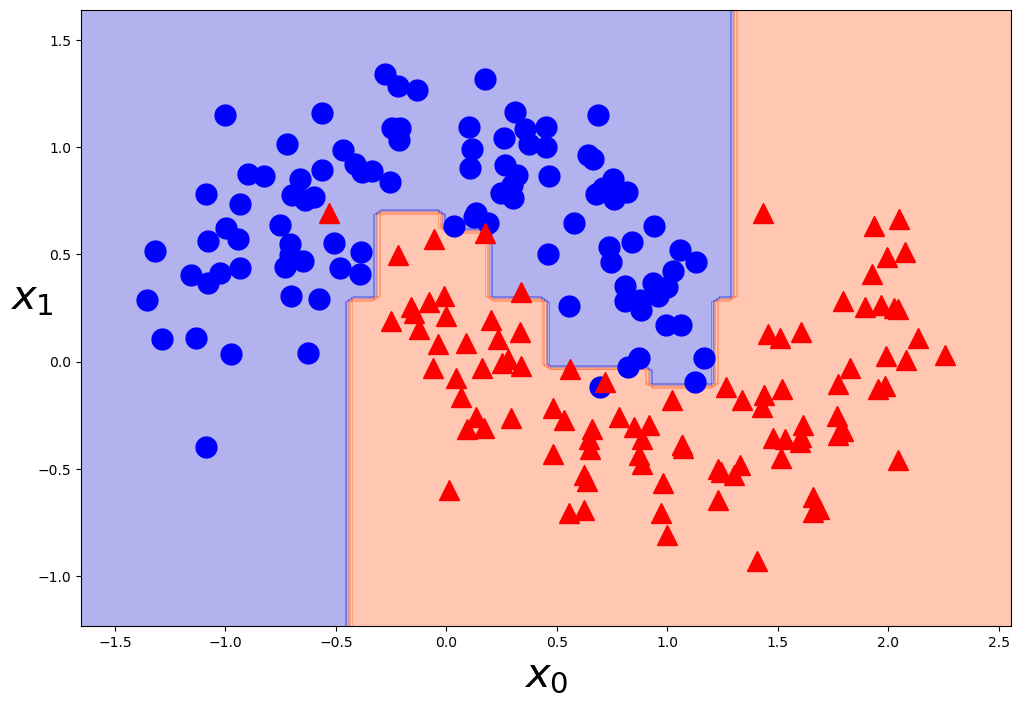

In [7]:
plt.figure(figsize=(12,8))
plot_decision_boundary(tree_clf,x,y)
plot_dataset(x,y)

# 決定木では、分類面が直線になってしまう。
plt.show()

In [8]:
# ランダムフォレストの場合
from sklearn.ensemble import RandomForestClassifier

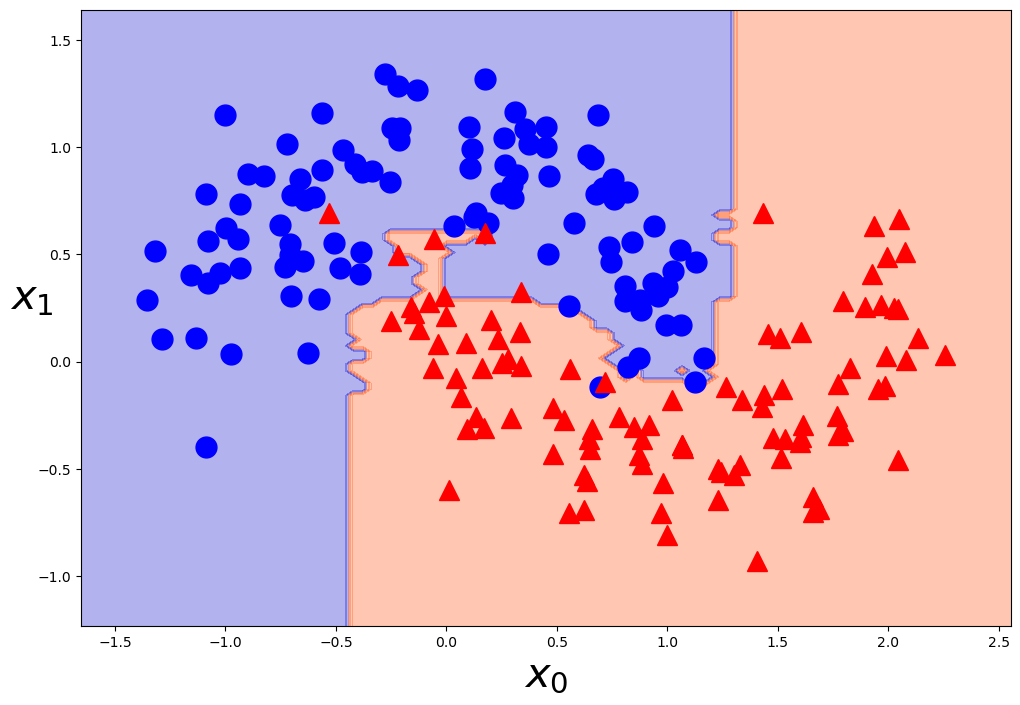

In [9]:
# ランダムフォレストを実行
# n_estimators: 木の組み合わせ数
random_forest = RandomForestClassifier(n_estimators=100,random_state=0).fit(x_train,y_train)

# 分類面で曲線も表現できるようになった。
plt.figure(figsize=(12,8))
plot_decision_boundary(random_forest,x,y)
plot_dataset(x,y)
plt.show()

In [10]:
# irisデータで実行してみる
from sklearn.datasets import load_iris

In [11]:
iris = load_iris()
x_iris = iris.data
y_iris = iris.target

In [12]:
# irisデータセットに保存されている特徴名
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
# ランダムフォレストを実行
random_forest_iris = RandomForestClassifier(n_estimators=100,random_state=0).fit(x_iris,y_iris)

In [14]:
# 学習したデータの特徴量の重要度を表示できる。
# 各データ番号は、特徴名にそれぞれ対応する。
random_forest_iris.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

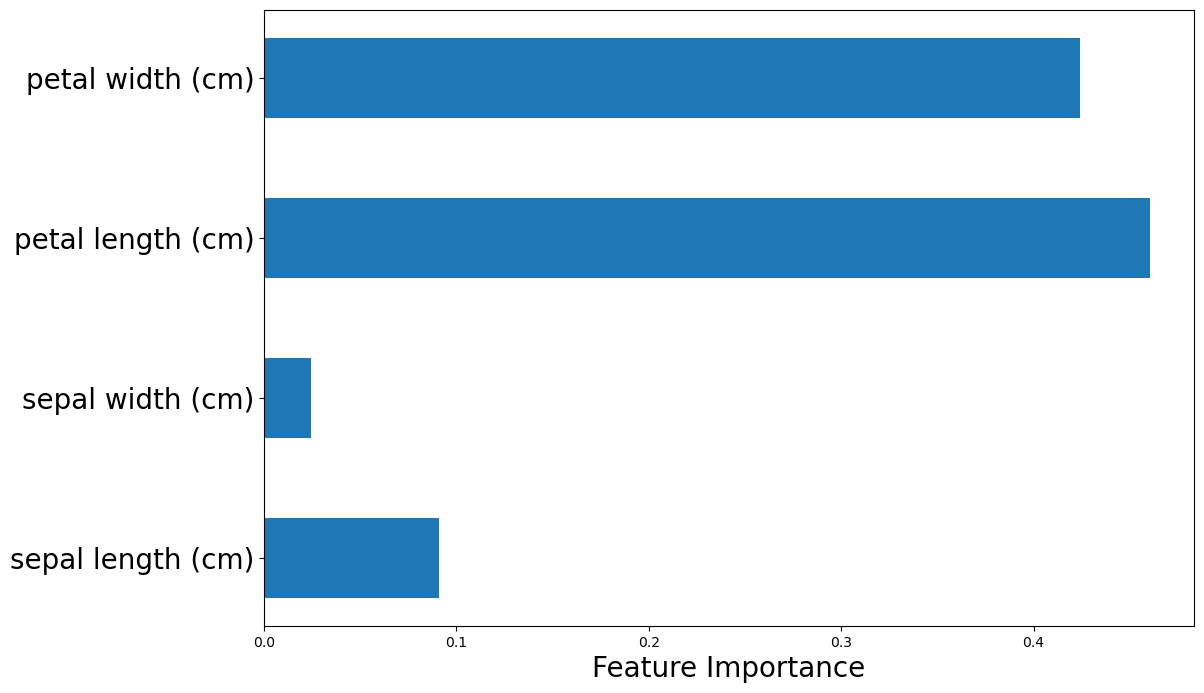

In [15]:
plt.figure(figsize=(12,8))
plt.barh(range(iris.data.shape[1]),random_forest_iris.feature_importances_,height=0.5)
plt.yticks(range(iris.data.shape[1]),iris.feature_names,fontsize=20)
plt.xlabel('Feature Importance',fontsize=20)
plt.show()

In [16]:
# さらに現実的なデータセットで学習してみる
# titanicデータセットのSurvived(0 or 1)を予測してみる。
import pandas as pd

df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# Survivedを予測することが目標
# RangeIndex: 891なので、891個のデータがある。
# ageの欠損値をageの平均値で埋める
df['Age'] = df['Age'].fillna(df['Age'].mean())
# Embarkedの欠損値をEmbarkedの最頻値で埋める
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# ageとEmbarkedのデータ数が891個になったことを確認する
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# カテゴリー名を文字列から数値に変換する
# 今回のデータセットでは、sexとEmbarkedを数値に変換する

# 文字データを数字に変更
from sklearn.preprocessing import LabelEncoder

cat_features = ['Sex','Embarked']

for col in cat_features:
    lbl = LabelEncoder()
    df[col] = lbl.fit_transform(list(df[col].values))

In [20]:
# sexとEmbarkedが数値で表現されていることを確認する
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [21]:
# 以上がデータの前処理
# 使わないデータをdrop
x = df.drop(columns=['PassengerId','Survived','Name','Ticket','Cabin'])

#予測の対象となるデータ
y = df['Survived']

In [22]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [24]:
# 決定木を実行
tree = DecisionTreeClassifier().fit(x_train,y_train)

# 正答率
tree.score(x_test,y_test)

0.7533632286995515

In [25]:
# ランダムフォレストを実行
rnd_forest = RandomForestClassifier(n_estimators=500,max_depth=5,random_state=0).fit(x_train,y_train)

# 正答率
rnd_forest.score(x_test,y_test)

0.8295964125560538

In [26]:
# 機械学習コンテスト用のテストデータを学習させてみる。
test_df = pd.read_csv('titanic_test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
# 欠損値を埋める
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
# カテゴリー名を文字列から数値に変換する
cat_features = ['Sex','Embarked']

for col in cat_features:
    lbl = LabelEncoder()
    test_df[col] = lbl.fit_transform(list(test_df[col].values))

In [30]:
# 学習に使用しない特徴を除く
x_pred = test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
ID = test_df['PassengerId']

In [31]:
prediction = rnd_forest.predict(x_pred)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
# ファイルとして出力するフォーマットを指定
submission = pd.DataFrame({
    'PassengerId': ID,
    'Survived': prediction
})

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [33]:
# index=False :左端のデータ番号を書き出すファイルに含めない
submission.to_csv('11_titanic_test_output.csv',index=False)